<a href="https://colab.research.google.com/github/arpitp1234/machinelearning/blob/main/Customer_Churn_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all the important libraries required for developing the model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
#reading the dataset from pandas library
churn=pd.read_csv("/content/Churn-Modelling.csv")

# New Section

In [ ]:
#displaying the first five rows of the dataframe using the head command
churn.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Exited', ylabel='count'>

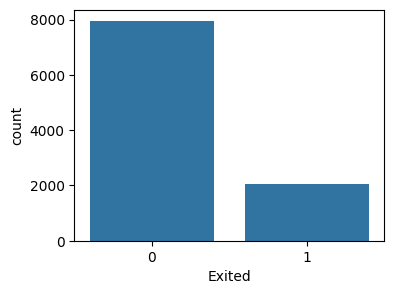

In [ ]:
#countplot of the exited customers reprsented by 1 and represented by 0 those who are note exited
plt.figure(figsize=(4,3))
sns.countplot(x='Exited',data=churn)

In [ ]:
#dropping the unwanted labels
churn=churn.drop(labels={'Gender','Geography','Surname'},axis=1)
#info the dataset
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [ ]:
#features to be selected as predictors
selected_features=['RowNumber','CustomerId','CreditScore','Age','Tenure','Balance'
,'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
#taking X as predictor and y as target variable
X=churn[selected_features]
Y=churn['Exited']

In [ ]:
X

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,42,2,0.00,1,1,1,101348.88
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57
3,4,15701354,699,39,1,0.00,2,0,0,93826.63
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52


In [ ]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
#normalizing the dataset using MinMaxScaler()
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
#Splitting the dataset into training and testing sets
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2)


In [ ]:
#imported ANN through keras API and tenserflow
#ANN is just to check how it perform on the dataset
tf.random.set_seed(42)
classifier_model=tf.keras.models.Sequential()
classifier_model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(10,)))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units=50,activation='relu'))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units=50,activation='relu'))
classifier_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
#compiled Ann model
classifier_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')

In [ ]:
#calculating the epochs on training and validation dataset
from tensorflow.keras.callbacks import EarlyStopping
Early_Stop=EarlyStopping()
epochs_hist = classifier_model.fit(X_train,Y_train,epochs = 50, validation_data = (X_test, Y_test), batch_size=125,callbacks=[Early_Stop])

Epoch 1/50
64/64 [==============================] - 1s 7ms/step - loss: 0.5609 - accuracy: 0.7369 - val_loss: 0.5054 - val_accuracy: 0.7865
Epoch 2/50
64/64 [==============================] - 0s 4ms/step - loss: 0.4860 - accuracy: 0.7987 - val_loss: 0.4876 - val_accuracy: 0.7865
Epoch 3/50
64/64 [==============================] - 0s 4ms/step - loss: 0.4651 - accuracy: 0.7994 - val_loss: 0.4716 - val_accuracy: 0.7875
Epoch 4/50
64/64 [==============================] - 0s 4ms/step - loss: 0.4520 - accuracy: 0.8059 - val_loss: 0.4663 - val_accuracy: 0.8005
Epoch 5/50
64/64 [==============================] - 0s 4ms/step - loss: 0.4400 - accuracy: 0.8170 - val_loss: 0.4484 - val_accuracy: 0.8180
Epoch 6/50
64/64 [==============================] - 0s 4ms/step - loss: 0.4251 - accuracy: 0.8245 - val_loss: 0.4332 - val_accuracy: 0.8240
Epoch 7/50
64/64 [==============================] - 0s 4ms/step - loss: 0.4115 - accuracy: 0.8336 - val_loss: 0.4139 - val_accuracy: 0.8335
Epoch 8/50
64/64 [==

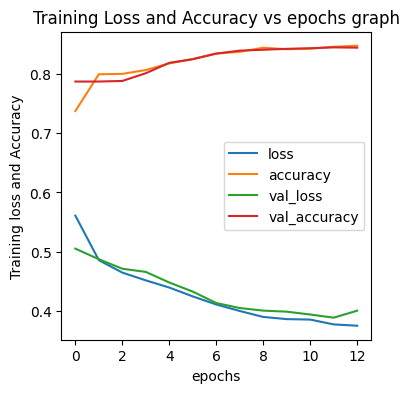

In [ ]:
#plotting the graph between the training loass and accuracy vs number epochs
plt.figure(figsize=(4,4))
eh=epochs_hist.history['loss']
eh2=epochs_hist.history['accuracy']
eh3=epochs_hist.history['val_loss']
eh4=epochs_hist.history['val_accuracy']
plt.plot(eh)
plt.plot(eh2)
plt.plot(eh3)
plt.plot(eh4)
plt.title('Training Loss and Accuracy vs epochs graph')
plt.xlabel('epochs')
plt.ylabel('Training loss and Accuracy')
plt.legend(['loss','accuracy','val_loss','val_accuracy'])

In [ ]:
#evaluating the model on the testing dataset
evaluation=classifier_model.evaluate(X_test,Y_test)
print('test.accuracy:{}'.format(evaluation[1]))

63/63 [==============================] - 0s 3ms/step - loss: 0.4011 - accuracy: 0.8435
test.accuracy:0.843500018119812


In [ ]:
#prediction of the model
Y_test_predict=classifier_model.predict(X_test)
#filtering those values greater than 0.5 in testing dataset
Y_test_predict=(Y_test_predict>0.5)
#predict the values on the training test
Y_train_predict=classifier_model.predict(X_train)
#filtering those value greater than 0.5 in training dataset
Y_train_predict=(Y_train_predict>0.5)

250/250 [==============================] - 2s 6ms/step


<Axes: >

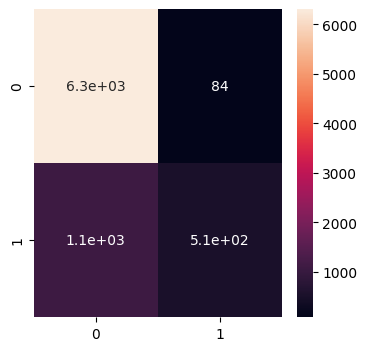

In [ ]:
#plotting the confusion_matrix,classification_report
plt.figure(figsize=(4,4))
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(Y_train,Y_train_predict)
sns.heatmap(cm,annot=True)

<Axes: >

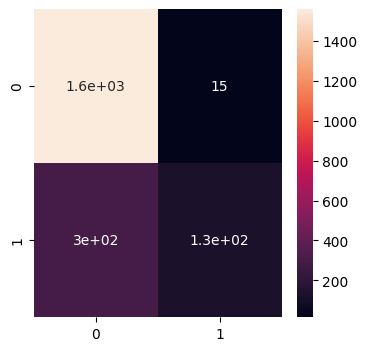

In [ ]:
#plotting the confusion matrix of testing dataset
plt.figure(figsize=(4,4))
cm2=confusion_matrix(Y_test,Y_test_predict)
sns.heatmap(cm2,annot=True)

In [ ]:
#printing the classification report of training and testing dataset
print("Training Report :\n",classification_report(Y_train,Y_train_predict))
print("Training Report :\n",classification_report(Y_test,Y_test_predict))


Training Report :
               precision    recall  f1-score   support

           0       0.85      0.99      0.91      6390
           1       0.86      0.32      0.47      1610

    accuracy                           0.85      8000
   macro avg       0.86      0.65      0.69      8000
weighted avg       0.85      0.85      0.82      8000

Training Report :
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1573
           1       0.90      0.30      0.45       427

    accuracy                           0.84      2000
   macro avg       0.87      0.65      0.68      2000
weighted avg       0.85      0.84      0.81      2000



In [ ]:
#Now we will update the model based on various parameters
#Code for accuracy graph will be same in the complete project.
#A.Update the optimiser
#When we updated the optimizer for different optimizer we got different accuracies.


In [ ]:
#1.optimizer=RMSprop
classifier_model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics='accuracy')
#calculating the epochs on training and validation dataset
from tensorflow.keras.callbacks import EarlyStopping
Early_Stop=EarlyStopping()
epochs_hist=classifier_model.fit(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test),batch_size=125 ,callbacks=[Early_Stop])


Epoch 1/5
64/64 [==============================] - 1s 7ms/step - loss: 0.3467 - accuracy: 0.8579 - val_loss: 0.3801 - val_accuracy: 0.8440
Epoch 2/5
64/64 [==============================] - 0s 4ms/step - loss: 0.3472 - accuracy: 0.8580 - val_loss: 0.3800 - val_accuracy: 0.8470
Epoch 3/5
64/64 [==============================] - 0s 4ms/step - loss: 0.3567 - accuracy: 0.8547 - val_loss: 0.3783 - val_accuracy: 0.8475
Epoch 4/5
64/64 [==============================] - 0s 4ms/step - loss: 0.3583 - accuracy: 0.8549 - val_loss: 0.3823 - val_accuracy: 0.8485


In [ ]:
#2.optimizer=Adadelta
classifier_model.compile(optimizer='Adadelta',loss='binary_crossentropy',metrics='accuracy')
#calculation the epochs on training and validation dataset
from tensorflow.keras.callbacks import EarlyStopping
Early_Stop=EarlyStopping()
epochs_hist=classifier_model.fit(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test),batch_size=125,callbacks=[Early_Stop])

Epoch 1/5
64/64 [==============================] - 1s 6ms/step - loss: 0.3401 - accuracy: 0.8596 - val_loss: 0.3823 - val_accuracy: 0.8485
Epoch 2/5
64/64 [==============================] - 0s 4ms/step - loss: 0.3417 - accuracy: 0.8596 - val_loss: 0.3822 - val_accuracy: 0.8485
Epoch 3/5
64/64 [==============================] - 0s 4ms/step - loss: 0.3491 - accuracy: 0.8564 - val_loss: 0.3822 - val_accuracy: 0.8485
Epoch 4/5
64/64 [==============================] - 0s 4ms/step - loss: 0.3488 - accuracy: 0.8590 - val_loss: 0.3822 - val_accuracy: 0.8485
Epoch 5/5
64/64 [==============================] - 0s 4ms/step - loss: 0.3556 - accuracy: 0.8569 - val_loss: 0.3821 - val_accuracy: 0.8485


In [ ]:
#3.Optimizer=Adagrad
classifier_model.compile(optimizer='Adagrad',loss='binary_crossentropy',metrics='accuracy')
#calcualting the epochs on training import EarlyStopping
Early_Stop=EarlyStopping()
epochs_hist=classifier_model.fit(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test),batch_size=125,callbacks=[Early_Stop])

Epoch 1/5
64/64 [==============================] - 1s 6ms/step - loss: 0.3390 - accuracy: 0.8604 - val_loss: 0.3810 - val_accuracy: 0.8470
Epoch 2/5
64/64 [==============================] - 0s 4ms/step - loss: 0.3407 - accuracy: 0.8600 - val_loss: 0.3813 - val_accuracy: 0.8465


In [ ]:
#B.Changing the activation functions
#1.Linear Activation

tf.random.set_seed(42)
classifier_model = tf.keras.models.Sequential()
classifier_model.add(tf.keras.layers.Dense(units = 100, activation = 'linear', input_shape = (10,)))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units = 50, activation = 'linear'))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units = 50, activation = 'linear'))
classifier_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
classifier_model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = 'accuracy')
#calculating the epochs on training and validation dataset
from tensorflow.keras.callbacks import EarlyStopping
Early_Stop = EarlyStopping()
epochs_hist = classifier_model.fit(X_train,Y_train,epochs = 5, validation_data = (X_test, Y_test), batch_size=125,callbacks=[Early_Stop])


Epoch 1/5
64/64 [==============================] - 1s 6ms/step - loss: 0.4974 - accuracy: 0.7946 - val_loss: 0.4886 - val_accuracy: 0.7885
Epoch 2/5
64/64 [==============================] - 0s 6ms/step - loss: 0.4696 - accuracy: 0.8037 - val_loss: 0.4728 - val_accuracy: 0.7975
Epoch 3/5
64/64 [==============================] - 0s 7ms/step - loss: 0.4571 - accuracy: 0.8056 - val_loss: 0.4713 - val_accuracy: 0.7995
Epoch 4/5
64/64 [==============================] - 0s 7ms/step - loss: 0.4508 - accuracy: 0.8114 - val_loss: 0.4730 - val_accuracy: 0.8000


In [ ]:
#2.Tanh Activation
tf.random.set_seed(42)
classifier_model=tf.keras.models.Sequential()
classifier_model.add(tf.keras.layers.Dense(units=100,activation='tanh',input_shape=(10,)))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units=50,activation='tanh'))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units=50,activation='tanh'))
classifier_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
classifier_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')
#calculating the epochs on training and validation dataset
from tensorflow.keras.callbacks import EarlyStopping
Early_Stop=EarlyStopping()
epochs_hist=classifier_model.fit(X_train, Y_train, epochs=5, validation_data=(X_test,Y_test), batch_size=125, callbacks=[Early_Stop])

Epoch 1/5
64/64 [==============================] - 3s 19ms/step - loss: 0.5132 - accuracy: 0.7844 - val_loss: 0.4948 - val_accuracy: 0.7865
Epoch 2/5
64/64 [==============================] - 1s 10ms/step - loss: 0.4734 - accuracy: 0.8008 - val_loss: 0.4794 - val_accuracy: 0.7925
Epoch 3/5
64/64 [==============================] - 1s 10ms/step - loss: 0.4604 - accuracy: 0.8045 - val_loss: 0.4755 - val_accuracy: 0.7965
Epoch 4/5
64/64 [==============================] - 1s 9ms/step - loss: 0.4468 - accuracy: 0.8099 - val_loss: 0.4745 - val_accuracy: 0.8000
Epoch 5/5
64/64 [==============================] - 1s 10ms/step - loss: 0.4483 - accuracy: 0.8104 - val_loss: 0.4702 - val_accuracy: 0.8035


In [ ]:
#C.Incrase Number of Neurons
#imported ANN through keras API and tensorflow
#ANN is just to check how it performs on the dataset
tf.random.set_seed(42)
classifier_model=tf.keras.models.Sequential()
classifier_model.add(tf.keras.layers.Dense(units=256,activation='relu',input_shape=(10,)))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units=128,activation='relu'))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units=64,activation='relu'))
classifier_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
classifier_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')
#calculation the epochs on trainig and validation dataset
from tensorflow.keras.callbacks import EarlyStopping
Early_Stop=EarlyStopping()
epochs_hist=classifier_model.fit(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test),batch_size=125,callbacks=[Early_Stop])


Epoch 1/5
64/64 [==============================] - 2s 13ms/step - loss: 0.5100 - accuracy: 0.7908 - val_loss: 0.4991 - val_accuracy: 0.7865
Epoch 2/5
64/64 [==============================] - 1s 8ms/step - loss: 0.4677 - accuracy: 0.7995 - val_loss: 0.4683 - val_accuracy: 0.7915
Epoch 3/5
64/64 [==============================] - 1s 9ms/step - loss: 0.4451 - accuracy: 0.8092 - val_loss: 0.4591 - val_accuracy: 0.8055
Epoch 4/5
64/64 [==============================] - 1s 10ms/step - loss: 0.4232 - accuracy: 0.8215 - val_loss: 0.4410 - val_accuracy: 0.8210
Epoch 5/5
64/64 [==============================] - 1s 8ms/step - loss: 0.4057 - accuracy: 0.8357 - val_loss: 0.4220 - val_accuracy: 0.8335


(10000, 14)